# Trabajo Práctico N. ° 1: Análisis exploratorio de datos de TROCAFONE

Primero se cargarán los datos propuestos por la cátedra y se hará un análisis inicial del dataframe.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

events = pd.read_csv('./data/events.csv')

pd.set_option('display.max_columns', 51)

In [2]:
# analizemos primero las dimensiones del data frame
events.shape

(1011288, 23)

### Transformación de object a timestamp
Para poder trabajar con las fechas y hacer un análisis en base a esto debemos transformar los object a tipo de dato fecha.


In [3]:
events['timestamp'] = pd.to_datetime(events['timestamp'])

Agregamos las columnas de año y mes

In [4]:
# Vemos algunos datos por las fechas
events['hour'] = events['timestamp'].dt.hour
events['month'] = events['timestamp'].dt.month
events['week_year'] = events['timestamp'].dt.weekofyear
events['week'] = events['timestamp'].dt.week
events['year'] = events['timestamp'].dt.year
events['day_week'] = events['timestamp'].dt.dayofweek
events['month_day'] = events['timestamp'].dt.day
events['is_weekend'] = (events.day_week == 5) | (events.day_week == 6)
events_count_per_week = events['week_year'].value_counts()
# print(events['month'].value_counts()) Tenemos valores de enero a julio
# print(events['year'].value_counts()) Tenemos valores solo de 2018
# print(events['month_day'].value_counts())
# print(events['day_week'].value_counts())
events_count_per_week.sort_values(axis=0, ascending=True)
events_count_per_week = events_count_per_week.to_frame()
events_count_per_week['week'] = events_count_per_week.index
# print(events_count_per_week) Sin ordenar aun
# print(events['year_day'].value_counts())
# Ordenamos por semana del anio
events_count_per_week.sort_values(by='week', inplace=True)
print(events_count_per_week)


    week_year  week
1        2710     1
2        4497     2
3        4918     3
4        4922     4
5        5086     5
6        4989     6
7        6398     7
8        8822     8
9       10310     9
10      13879    10
11      16893    11
12      21607    12
13      21382    13
14      26487    14
15      28613    15
16      27712    16
17      38581    17
18      51040    18
19      72658    19
20     146430    20
21     124961    21
22     142782    22
23     140573    23
24      85038    24


In [5]:
# Sacamos los datos de la ultima semana ya que posiblemente no tengamos informacion de la semana completa
events_count_per_week = events_count_per_week.loc[events_count_per_week['week'] != 24]
# print(events_count_per_week)

Como podemos observar tenemos solo datos del año 2018 desde enero hasta junio. Tambien podemos ver que los usuarios suelen acceder a mas a TROCAFONE los dias de semana. 
A continuacion podemos ver como aumento la frecuencia de eventos a medida que avanzo el anio

Text(0,0.5,'Cantidad')

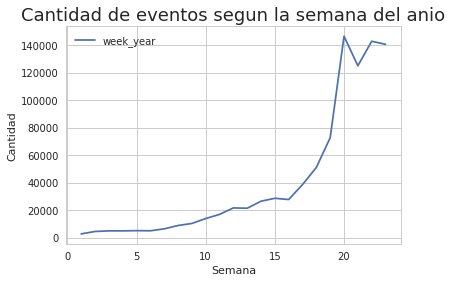

In [6]:
plot_events_per_week = events_count_per_week[['week_year']].plot.line()
plot_events_per_week.set_title("Cantidad de eventos segun la semana del anio", fontsize=18)
plot_events_per_week.set_xlabel("Semana")
plot_events_per_week.set_ylabel("Cantidad")


In [7]:
events['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [8]:
# Seleccionamos los eventos de sitio visitado
visited_site = events.loc[events['event'] == 'visited site' , : ]
visited_site.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 31 columns):
timestamp                   87378 non-null datetime64[ns]
event                       87378 non-null object
person                      87378 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                      87378 non-null object
country                  

In [9]:
# Vemos cuanta proporcion hay de new y returning
new_vs_returning_count = visited_site['new_vs_returning'].value_counts()
print(new_vs_returning_count)

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64


Text(0,0.5,'Cantidad')

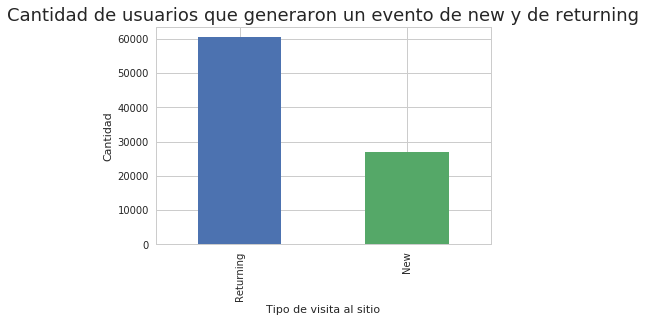

In [10]:
plot_new_vs_returning_counts = new_vs_returning_count.plot.bar()
plot_new_vs_returning_counts.set_title("Cantidad de usuarios que generaron un evento de new y de returning", fontsize=18)
plot_new_vs_returning_counts.set_xlabel("Tipo de visita al sitio")
plot_new_vs_returning_counts.set_ylabel("Cantidad")

In [11]:
# Queremos ver en que tipo de dispositivo acceden por primera vez los usuarios
news_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'New' , : ]
returning_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'Returning' , : ]
news_visited_site.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hour,month,week_year,week,year,day_week,month_day,is_weekend
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,23,5,22,22,2018,3,31,False
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,13,5,22,22,2018,1,29,False
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,20,4,15,15,2018,0,9,False
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,5,4,14,14,2018,4,6,False
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,0,5,20,20,2018,3,17,False


In [12]:
# Vemos los distintos tipos de accesos por primera vez
news_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.53
Computer                     0.45
Tablet                       0.02
Unknown                      0.00
Name: device_type, dtype: float64

De aqui podemos observar que la primera vez que acceden los usuarios a trocafone es casi igual de parejo entre computadoras de escritorio y celulares.

Veamos que sucede si vemos el tipo de dispositivo con el que vuelven los usuarios a la plataforma

In [13]:
# Vemos los distintos tipos de accesos en los eventos de visita
returning_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.49
Computer                     0.49
Tablet                       0.01
Unknown                      0.00
Name: device_type, dtype: float64

**Conclusion**: de estos datos inducimos que la experiencia del usuario en la plataforma es igual de buena tanto en mobile como en desktop

In [14]:
visited_site['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Italy                     7
Portugal                  7
Romania                   7
Guadeloupe                6
Russia                    6
Dominican Republic        6
Germany                   5
Paraguay                  4
Colombia                  4
Bangladesh                4
Switzerland               3
Morocco                   2
India                     2
Angola                    2
Turkey                    1
Saudi Arabia              1
Philippines               1
Zimbabwe                  1
Algeria                   1
South Africa              1
Rwanda                    1
China                     1
Uzbekistan                1
Sri Lanka           

In [15]:
len(visited_site)

87378

In [16]:
visited_site.dropna(axis='columns', inplace=True)

# Categorizamos las regiones geograficamente
visited_site['geo_region'] = np.nan

visited_site.loc[
    (visited_site['region'] == 'Sao Paulo') |
    (visited_site['region'] == 'Rio de Janeiro') |
    (visited_site['region'] == 'Minas Gerais') |
    (visited_site['region'] == 'Espirito Santo'), 
    'geo_region'
] = 'southeast'

visited_site.loc[
    (visited_site['region'] == 'Parana') |
    (visited_site['region'] == 'Rio Grande do Sul') |
    (visited_site['region'] == 'Santa Catarina'), 
    'geo_region'
] = 'south'

visited_site.loc[
    (visited_site['region'] == 'Federal District') |
    (visited_site['region'] == 'Goias') |
    (visited_site['region'] == 'Mato Grosso do Sul') |
    (visited_site['region'] == 'Mato Grosso'), 
    'geo_region'
] = 'center west'

visited_site.loc[
    (visited_site['region'] == 'Bahia') |
    (visited_site['region'] == 'Pernambuco') |
    (visited_site['region'] == 'Ceara') |
    (visited_site['region'] == 'Maranhao') |
    (visited_site['region'] == 'Rio Grande do Norte') |
    (visited_site['region'] == 'Paraíba') |
    (visited_site['region'] == 'Piaui') |
    (visited_site['region'] == 'Alagoas') |
    (visited_site['region'] == 'Sergipe'), 
    'geo_region'
] = 'northeast'

visited_site.loc[
    (visited_site['region'] == 'Para') |
    (visited_site['region'] == 'Amazonas') |
    (visited_site['region'] == 'Tocantins') |
    (visited_site['region'] == 'Amapa') |
    (visited_site['region'] == 'Rondonia') |
    (visited_site['region'] == 'Acre') |
    (visited_site['region'] == 'Roraima'), 
    'geo_region'
] = 'north'

In [17]:
visited_site_brazil = visited_site.loc[visited_site['country'] == 'Brazil']


cities = visited_site_brazil['city'].value_counts()
regions = visited_site_brazil['region'].value_counts()
countries = visited_site_brazil['country'].value_counts()
geo_region = visited_site_brazil['geo_region'].value_counts(normalize=True)
# print regions
# print countries
print geo_region
visited_site_brazil['geo_region'].count()


southeast                     0.57
northeast                     0.23
south                         0.09
center west                   0.06
north                         0.04
Name: geo_region, dtype: float64


71930

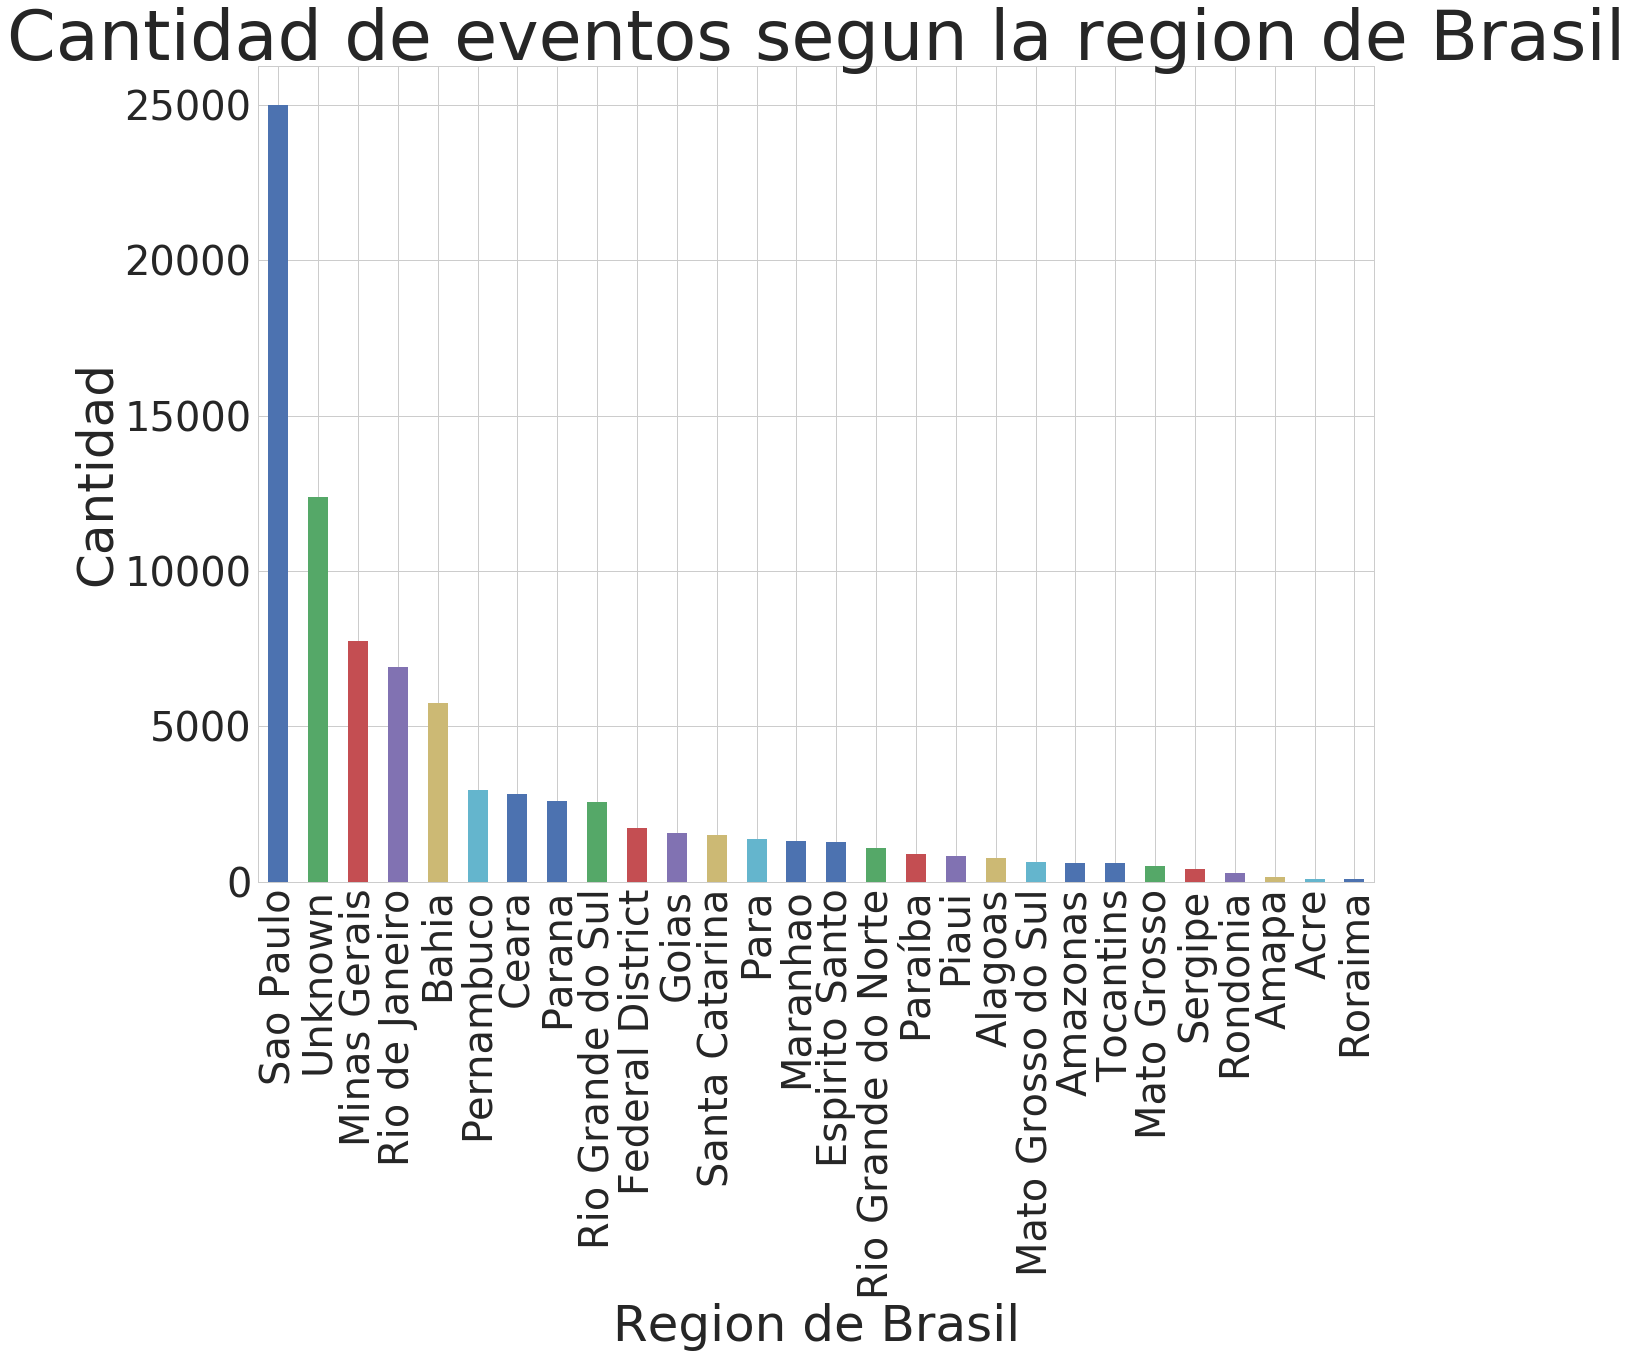

In [18]:
bar_regions_plot = regions.plot.bar(figsize=(20, 15), fontsize=40)
bar_regions_plot.set_title("Cantidad de eventos segun la region de Brasil", fontsize=70)
bar_regions_plot.set_xlabel("Region de Brasil", fontsize=50)
bar_regions_plot.set_ylabel("Cantidad", fontsize=50)
bar_regions_plot.get_figure().savefig('visited_per_region')

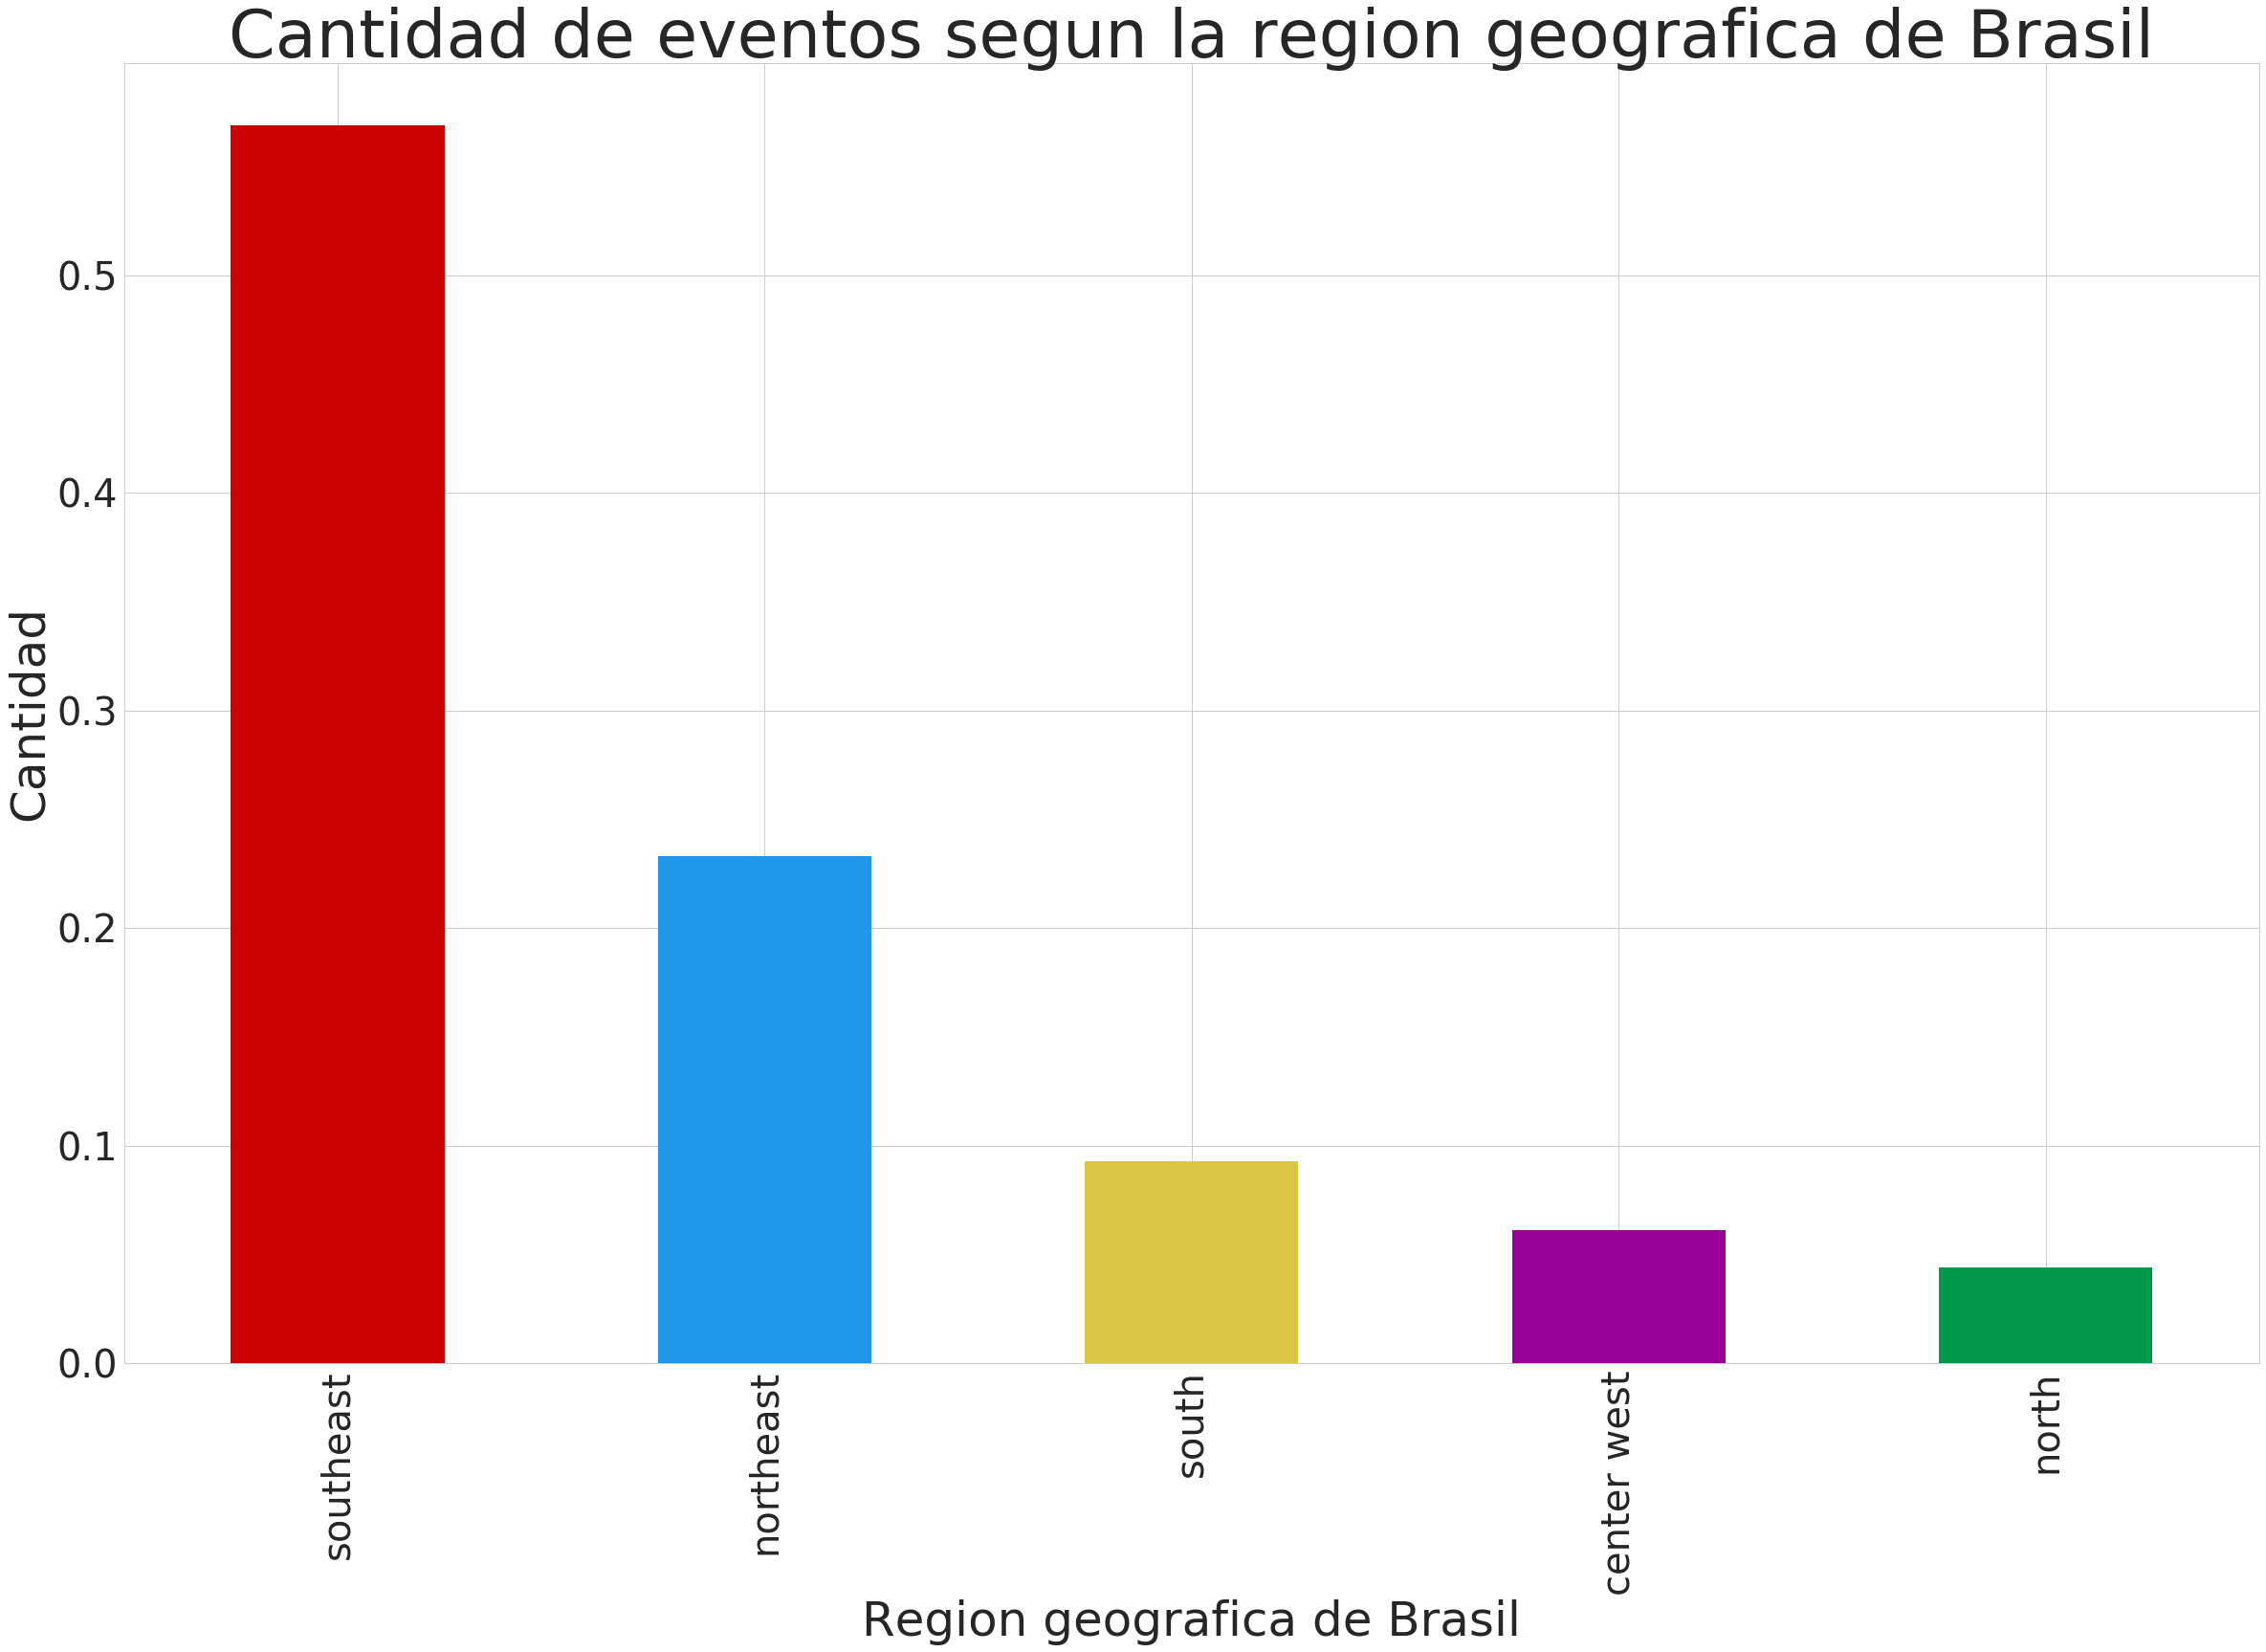

In [19]:
bar_geo_regions_plot = geo_region.plot.bar(figsize=(40, 25), fontsize=40, color=['#CC0000', '#1D97E9', '#DBC742', '#990099', '#00994C'])
bar_geo_regions_plot.set_title("Cantidad de eventos segun la region geografica de Brasil", fontsize=70)
bar_geo_regions_plot.set_xlabel("Region geografica de Brasil", fontsize=50)
bar_geo_regions_plot.set_ylabel("Cantidad", fontsize=50)
bar_geo_regions_plot.get_figure().savefig('visited_per_geo_region')

In [20]:
# Distintos tipos de dispositivos
visited_site_brazil['device_type'].value_counts()

Smartphone    42775
Computer      40239
Tablet         1180
Unknown         114
Name: device_type, dtype: int64

In [21]:
def reduceColumnLevel(df):
    l0 = df.columns.get_level_values(0)
    l1 = df.columns.get_level_values(1)
    df.columns = l0 + '_' + l1
    return df

In [22]:
visited_site_brazil_computer_or_smarthpone = visited_site_brazil.loc[(visited_site_brazil['device_type'] == 'Computer') | (visited_site_brazil['device_type'] == 'Smartphone')]

In [23]:
new_per_dispositive = visited_site_brazil_computer_or_smarthpone.loc[visited_site_brazil_computer_or_smarthpone['new_vs_returning'] == 'New']

Text(0,0.5,'Cantidad')

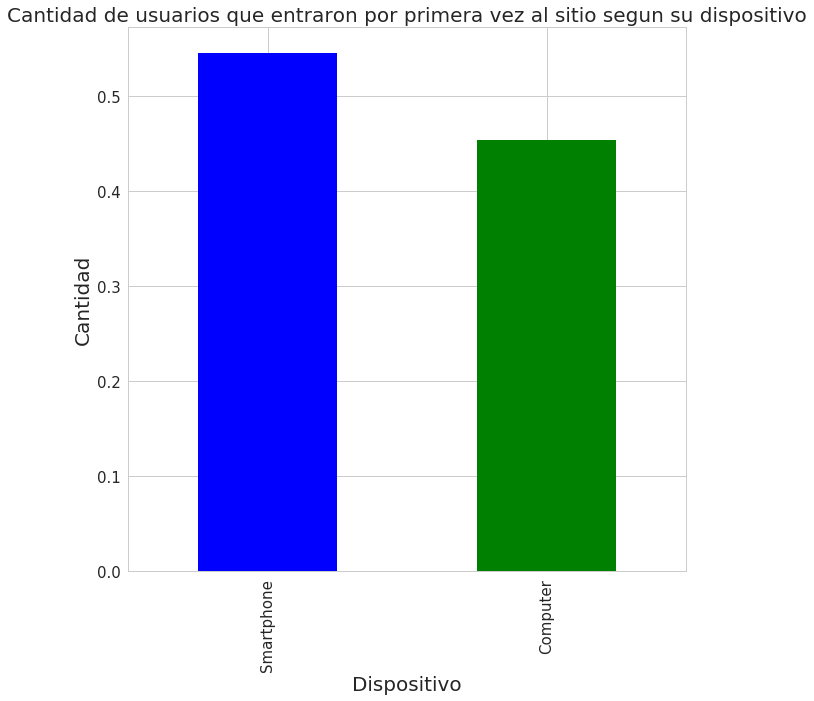

In [24]:
count_new_dispositive = new_per_dispositive['device_type'].value_counts(normalize=True)
plot_count_new_dispositive = count_new_dispositive.plot.bar(figsize=(10, 10), fontsize=15, color=['b', 'g'])
plot_count_new_dispositive.set_title("Cantidad de usuarios que entraron por primera vez al sitio segun su dispositivo", fontsize=20)
plot_count_new_dispositive.set_xlabel("Dispositivo", fontsize=20)
plot_count_new_dispositive.set_ylabel("Cantidad", fontsize=20)

In [25]:
returning_per_dispositive = visited_site_brazil_computer_or_smarthpone.loc[visited_site_brazil_computer_or_smarthpone['new_vs_returning'] == 'Returning']

Text(0,0.5,'Cantidad')

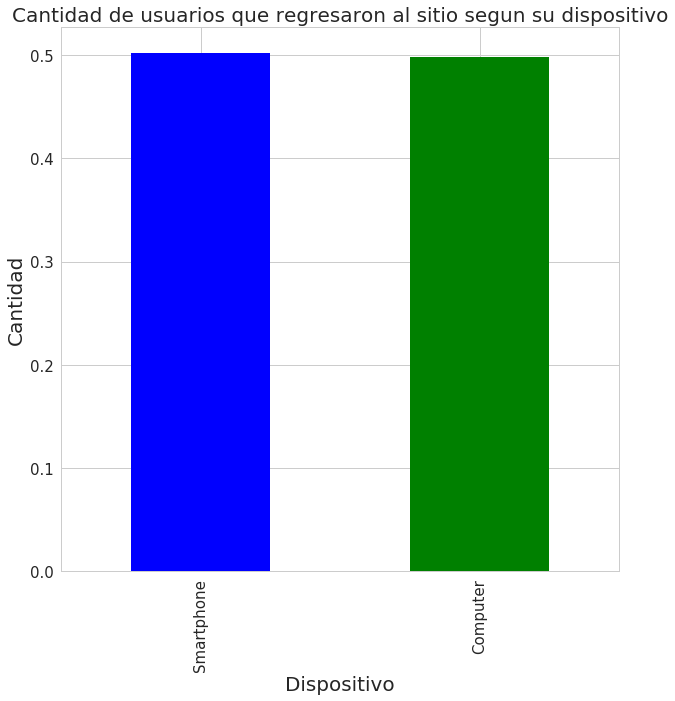

In [26]:
returning_per_dispositive['device_type'].value_counts(normalize=True)
count_ret_dispositive = returning_per_dispositive['device_type'].value_counts(normalize=True)
plot_count_ret_dispositive = count_ret_dispositive.plot.bar(figsize=(10, 10), fontsize=15, color=['b', 'g'])
plot_count_ret_dispositive.set_title("Cantidad de usuarios que regresaron al sitio segun su dispositivo", fontsize=20)
plot_count_ret_dispositive.set_xlabel("Dispositivo", fontsize=20)
plot_count_ret_dispositive.set_ylabel("Cantidad", fontsize=20)

In [27]:
devices_per_region = visited_site_brazil_computer_or_smarthpone.groupby(['geo_region', 'device_type']).agg({'event': ['count']})
devices_per_region.head(20)

event
                         count
geo_region  device_type       
center west Computer      2526
            Smartphone    1828
north       Computer      1632
            Smartphone    1476
northeast   Computer      7766
            Smartphone    8619
south       Computer      3737
            Smartphone    2857
southeast   Computer     18884
            Smartphone   21386

In [28]:
devices_per_region = reduceColumnLevel(devices_per_region)
devices_per_region.head(20)

event_count
geo_region  device_type             
center west Computer            2526
            Smartphone          1828
north       Computer            1632
            Smartphone          1476
northeast   Computer            7766
            Smartphone          8619
south       Computer            3737
            Smartphone          2857
southeast   Computer           18884
            Smartphone         21386

In [29]:
devices_per_region.unstack()

event_count           
device_type    Computer Smartphone
geo_region                        
center west        2526       1828
north              1632       1476
northeast          7766       8619
south              3737       2857
southeast         18884      21386

In [30]:
devices_per_region_pivot = devices_per_region.pivot_table(index='geo_region', columns='device_type', values='event_count')
devices_per_region_pivot = devices_per_region_pivot.sort_values(by='Computer', ascending=False)
devices_per_region_pivot

device_type,Computer,Smartphone
geo_region,,
southeast,18884,21386
northeast,7766,8619
south,3737,2857
center west,2526,1828
north,1632,1476


Text(0,0.5,'Cantidad de accesos')

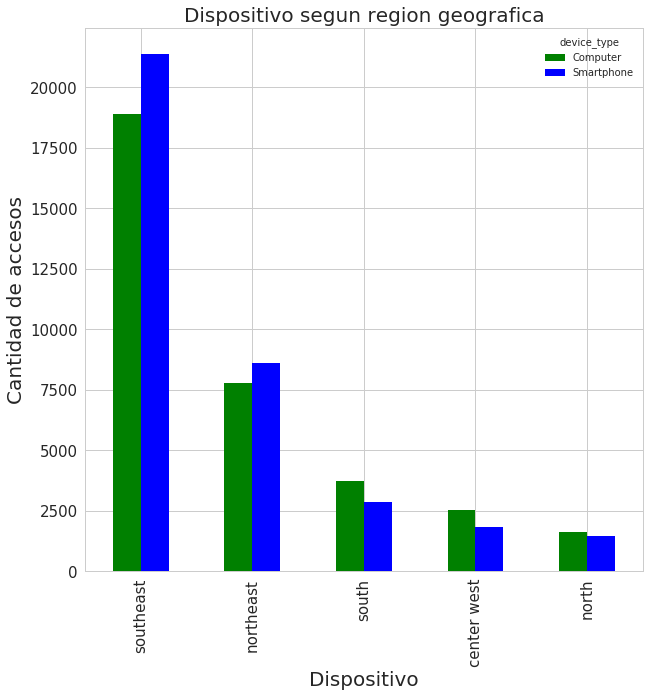

In [31]:
plot_devices_per_geo_region = devices_per_region_pivot.plot.bar(
    figsize=(10, 10), 
    fontsize=15,
    color=['g', 'b']
)
plot_devices_per_geo_region.set_title("Dispositivo segun region geografica", fontsize=20)
plot_devices_per_geo_region.set_xlabel("Dispositivo", fontsize=20)
plot_devices_per_geo_region.set_ylabel("Cantidad de accesos", fontsize=20)

In [32]:
def filterVisitedSitesByGeoRegion(df, region):
    return df.loc[df['geo_region'] == region]

In [33]:
def getWeekendVisites(df):
    return df.loc[df['is_weekend'] == True]

In [34]:
def getWeekdaysVisites(df):
    return df.loc[df['is_weekend'] == False]

In [35]:
# Accesos de los dispositivos segun la hora del dia en fin de semanas
tmp = visited_site_brazil_computer_or_smarthpone
visited_site_not_weekend = getWeekdaysVisites(tmp)
visited_site_weekend = getWeekendVisites(tmp)
devices_per_hour_on_weekend = visited_site_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})
devices_per_hour_on_weekend.head(10)

event
                 count
hour device_type      
0    Computer      474
     Smartphone    735
1    Computer      430
     Smartphone    667
2    Computer      380
     Smartphone    532
3    Computer      250
     Smartphone    346
4    Computer      120
     Smartphone    227

In [36]:
devices_per_hour_not_weekend = visited_site_not_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})
devices_per_hour_not_weekend.head(0)
# devices_per_hour_not_weekend.index

,,event
,,count
hour,device_type,


In [37]:
def plotEventCountByDevicePerHour(df, figsize=(8,8), fontsize=20):
    l0 = df.columns.get_level_values(0)
    l1 = df.columns.get_level_values(1)
    df.columns = l0 + '_' + l1
    unstacked = df.unstack()
    l0 = unstacked.columns.get_level_values(0)
    l1 = unstacked.columns.get_level_values(1)
    unstacked.columns = l0 + '_' + l1
    df_new = pd.DataFrame({
        'Computer': unstacked['event_count_Computer'],
        'Smartphone': unstacked['event_count_Smartphone'],
        }, 
        index=unstacked.index)
    plot = df_new.plot.line(figsize=figsize, fontsize=fontsize, color=['g', 'b'])
    # plot.legend(prop={'size': 5})
    return plot

Text(0.5,1,'Cantidad de visitas segun el dispositivo en cada hora del dia (lunes a viernes)')

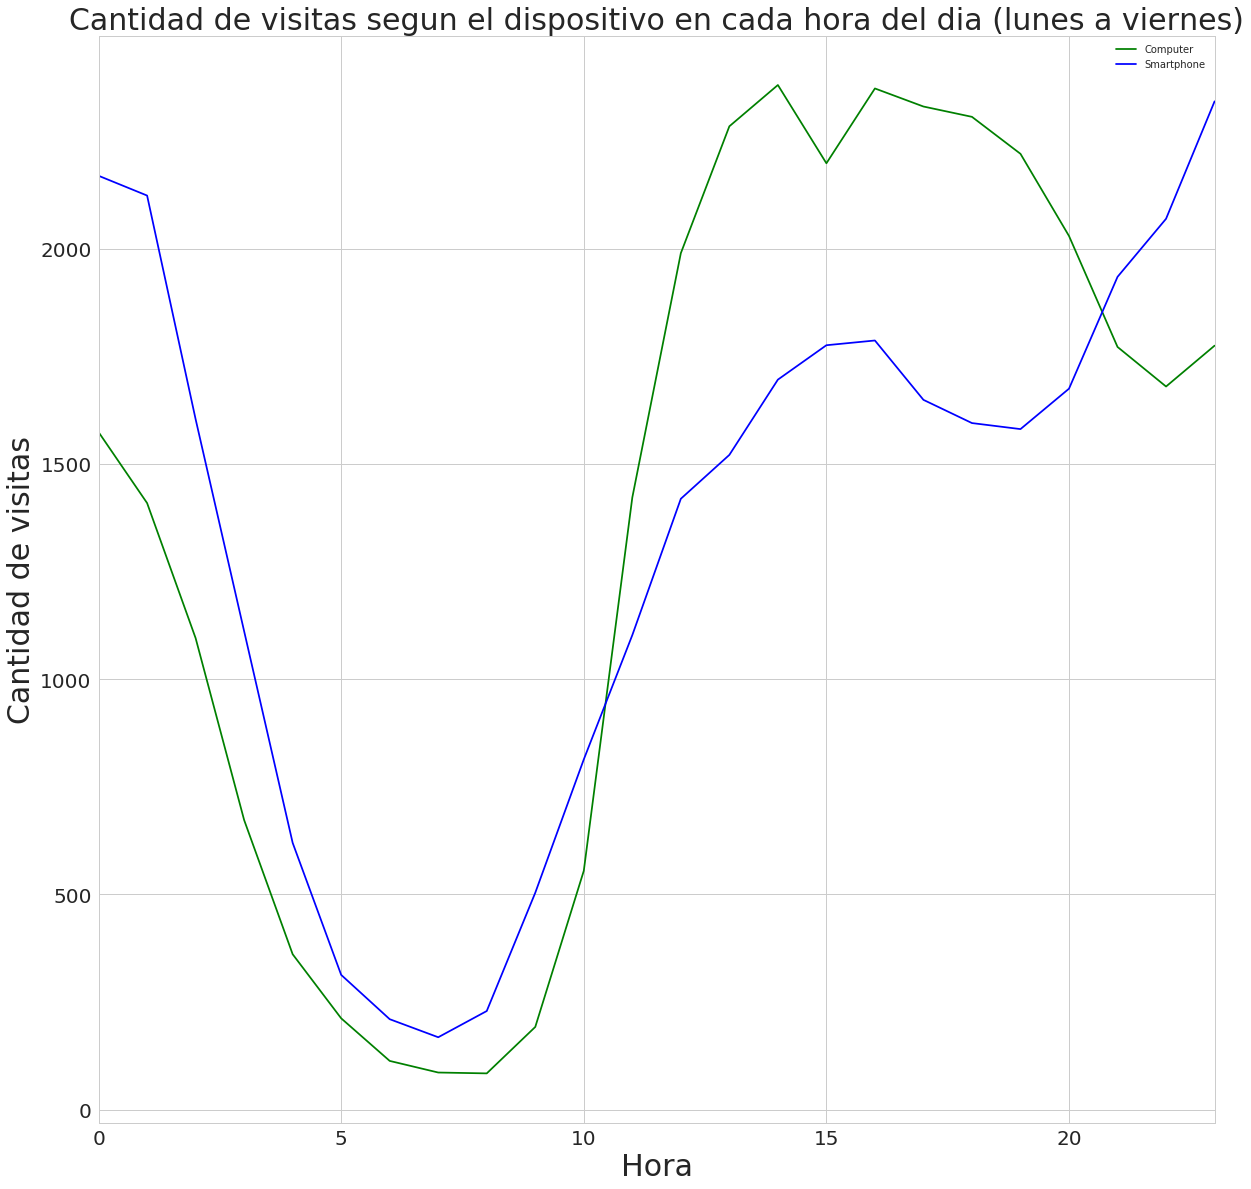

In [38]:
plot_on_weekdays = plotEventCountByDevicePerHour(devices_per_hour_not_weekend, figsize=(20,20))
plot_on_weekdays.set_xlim(0, 23)
plot_on_weekdays.set_xlabel('Hora', fontsize=30)
plot_on_weekdays.set_ylabel('Cantidad de visitas', fontsize=30)
plot_on_weekdays.set_title('Cantidad de visitas segun el dispositivo en cada hora del dia (lunes a viernes)', fontsize=30)

Text(0.5,1,'Cantidad de visitas segun el dispositivo en cada hora del dia (fin de semana)')

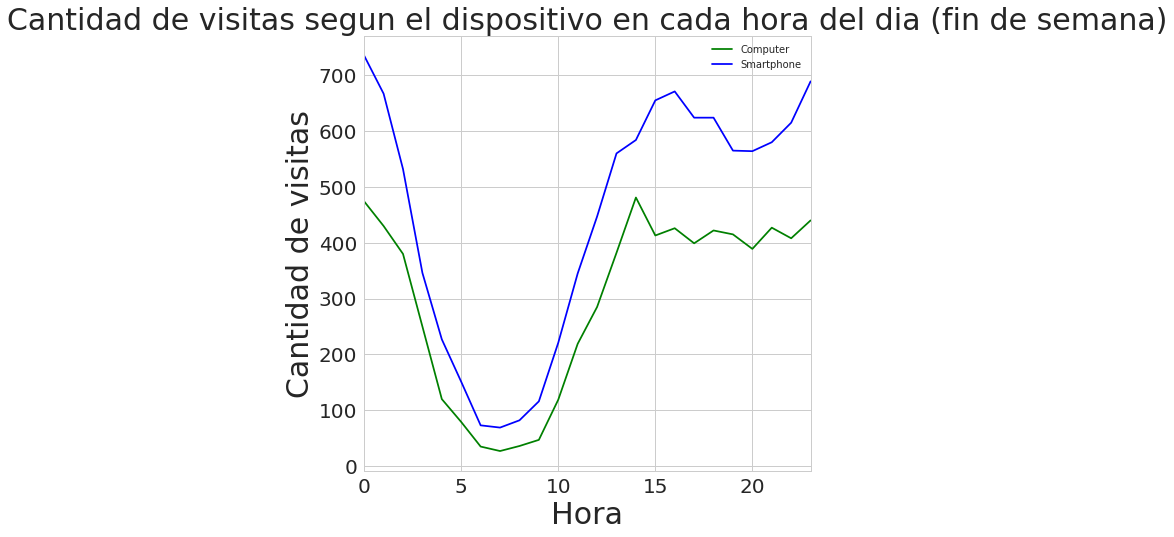

In [39]:
plot_on_weekend = plotEventCountByDevicePerHour(devices_per_hour_on_weekend)
plot_on_weekend.set_xlim(0, 23)
plot_on_weekend.set_xlabel('Hora', fontsize=30)
plot_on_weekend.set_ylabel('Cantidad de visitas', fontsize=30)
plot_on_weekend.set_title('Cantidad de visitas segun el dispositivo en cada hora del dia (fin de semana)', fontsize=30)

# Analisis de visitas segun horario particularizando en region
Ahora analizaremos las visitas segun el horario para los distintas regiones geograficas que se definieron previamente.

```
                        event_count
geo_region	device_type	

center west	Computer	2526
            Smartphone	1828
            
north	    Computer	1632
            Smartphone	1476
            
northeast	Computer	7766
            Smartphone	8619
            
south	    Computer	3737
            Smartphone	2857
            
southeast	Computer	18884
            Smartphone	21386
```

In [40]:
tmp = visited_site_brazil_computer_or_smarthpone

center_west = filterVisitedSitesByGeoRegion(tmp, 'center west')
north = filterVisitedSitesByGeoRegion(tmp, 'north')
northeast = filterVisitedSitesByGeoRegion(tmp, 'northeast')
south = filterVisitedSitesByGeoRegion(tmp, 'south')
southeast = filterVisitedSitesByGeoRegion(tmp, 'southeast')

# Filtamos por dia de seamana y fin de semana
center_west_weekdays = getWeekdaysVisites(center_west)
center_west_weekend = getWeekendVisites(center_west)

north_weekdays = getWeekdaysVisites(north)
north_weekend = getWeekendVisites(north)

northeast_weekdays = getWeekdaysVisites(northeast)
northeast_weekend = getWeekendVisites(northeast)

south_weekdays = getWeekdaysVisites(center_west)
south_weekend = getWeekendVisites(center_west)

southeast_weekdays = getWeekdaysVisites(southeast)
southeast_weekend = getWeekendVisites(southeast)

# Agrupamos
cw_group_wd = center_west_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
cw_group_we = center_west_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

n_group_wd = north_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
n_group_we = north_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

ne_group_wd = northeast_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
ne_group_we = northeast_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

s_group_wd = south_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
s_group_we = south_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

se_group_wd = southeast_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
se_group_we = southeast_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})



Text(0.5,1,'Fin de semana en el centro oeste')

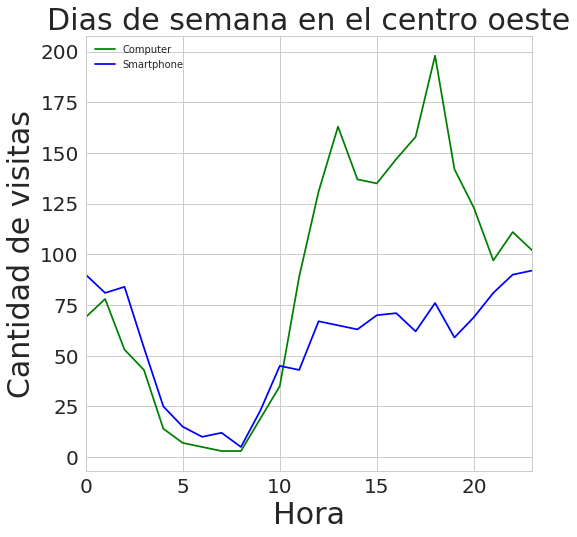

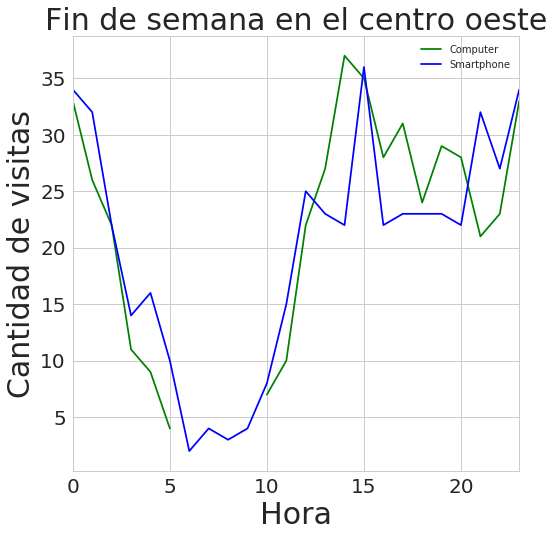

In [41]:
# Plot center west
p_cw_wd = plotEventCountByDevicePerHour(cw_group_wd)
p_cw_wd.set_xlim(0,23)
p_cw_wd.set_xlabel('Hora', fontsize=30)
p_cw_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_cw_wd.set_title('Dias de semana en el centro oeste', fontsize=30)

p_cw_we = plotEventCountByDevicePerHour(cw_group_we)
p_cw_we.set_xlim(0,23)
p_cw_we.set_xlabel('Hora', fontsize=30)
p_cw_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_cw_we.set_title('Fin de semana en el centro oeste', fontsize=30)

Text(0.5,1,'Fin de semana en el norte')

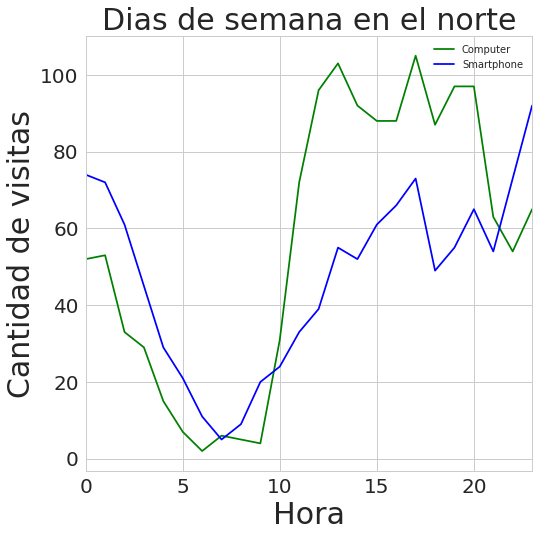

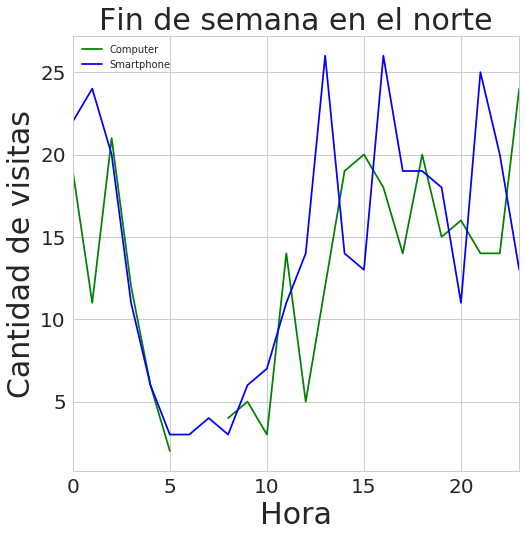

In [42]:
# Plot north
p_n_wd = plotEventCountByDevicePerHour(n_group_wd)
p_n_wd.set_xlim(0,23)
p_n_wd.set_xlabel('Hora', fontsize=30)
p_n_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_n_wd.set_title('Dias de semana en el norte', fontsize=30)

p_n_we = plotEventCountByDevicePerHour(n_group_we)
p_n_we.set_xlim(0,23)
p_n_we.set_xlabel('Hora', fontsize=30)
p_n_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_n_we.set_title('Fin de semana en el norte', fontsize=30)

Text(0.5,1,'Fin de semana en el noreste')

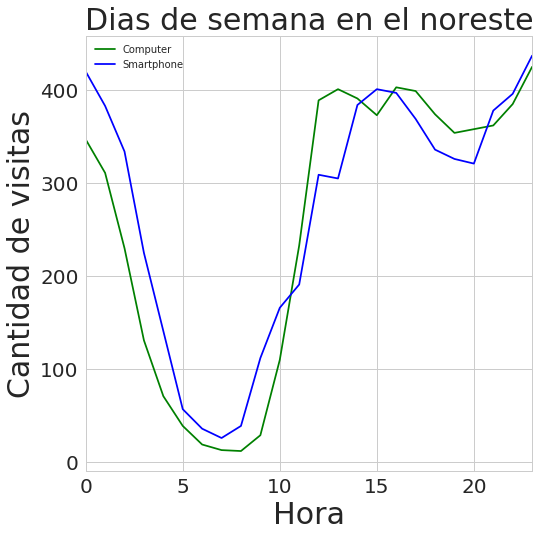

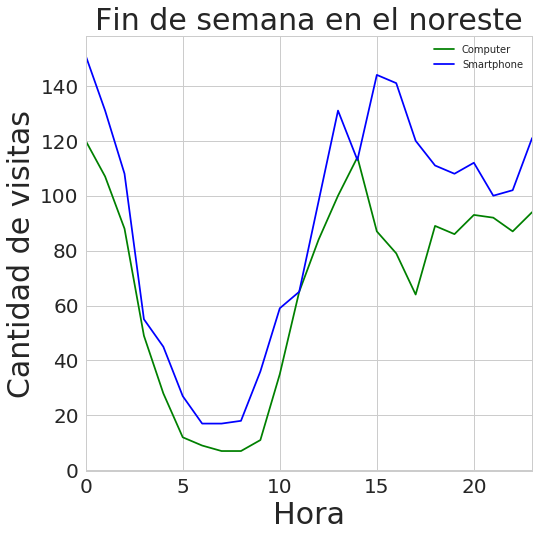

In [43]:
# Plot northeast
p_ne_wd = plotEventCountByDevicePerHour(ne_group_wd)
p_ne_wd.set_xlim(0,23)
p_ne_wd.set_xlabel('Hora', fontsize=30)
p_ne_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_ne_wd.set_title('Dias de semana en el noreste', fontsize=30)

p_ne_we = plotEventCountByDevicePerHour(ne_group_we)
p_ne_we.set_xlim(0,23)
p_ne_we.set_xlabel('Hora', fontsize=30)
p_ne_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_ne_we.set_title('Fin de semana en el noreste', fontsize=30)

Text(0.5,1,'Fin de semana en el sur')

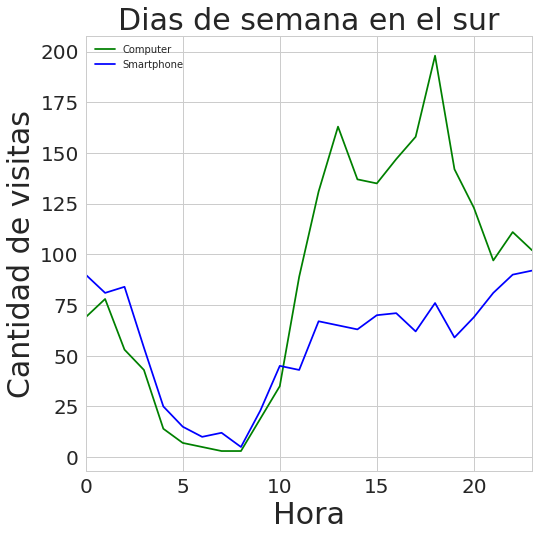

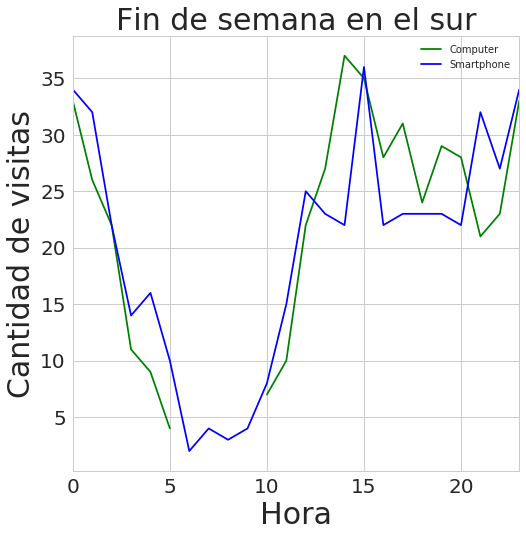

In [44]:
# Plot south
p_s_wd = plotEventCountByDevicePerHour(s_group_wd)
p_s_wd.set_xlim(0,23)
p_s_wd.set_xlabel('Hora', fontsize=30)
p_s_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_s_wd.set_title('Dias de semana en el sur', fontsize=30)

p_s_we = plotEventCountByDevicePerHour(s_group_we)
p_s_we.set_xlim(0,23)
p_s_we.set_xlabel('Hora', fontsize=30)
p_s_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_s_we.set_title('Fin de semana en el sur', fontsize=30)

Text(0.5,1,'Fin de semana en el sureste')

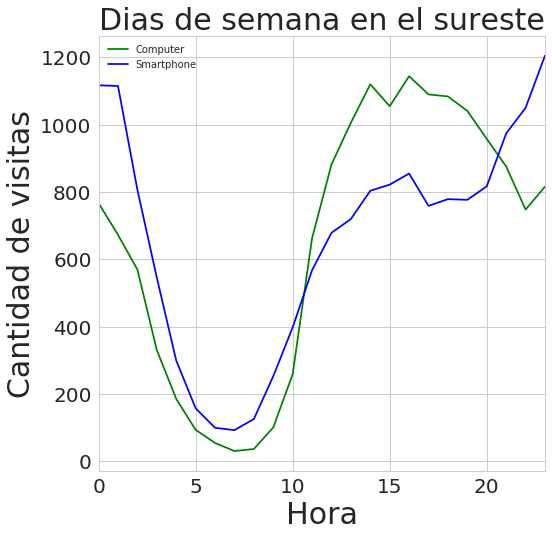

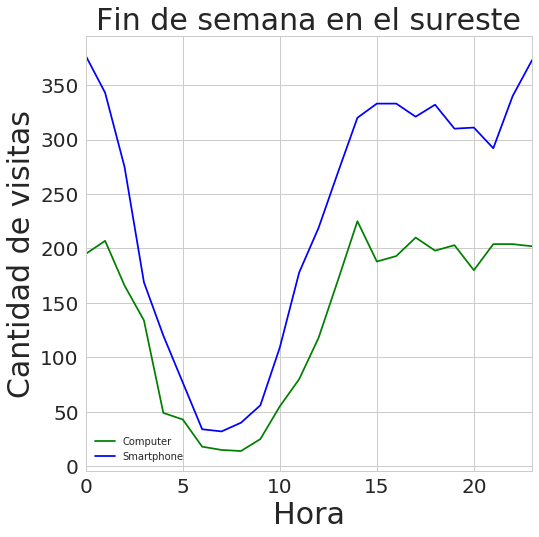

In [45]:
# Plot southeast
p_se_wd = plotEventCountByDevicePerHour(se_group_wd)
p_se_wd.set_xlim(0,23)
p_se_wd.set_xlabel('Hora', fontsize=30)
p_se_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_se_wd.set_title('Dias de semana en el sureste', fontsize=30)

p_se_we = plotEventCountByDevicePerHour(se_group_we)
p_se_we.set_xlim(0,23)
p_se_we.set_xlabel('Hora', fontsize=30)
p_se_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_se_we.set_title('Fin de semana en el sureste', fontsize=30)